- 작업
- 처음에는 얼굴 정규화 된 이미지로 사용 (face alignment)
- 이후에는 정규화 process 추가

In [1]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt
from collections import OrderedDict
from imutils import face_utils

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [3]:
input_img = cv2.imread('/home/문서/workspacetf/GAN_Project/data/input_image_1.jpg')
original_img = cv2.imread('/home/문서/workspacetf/GAN_Project/data/original_image_1.jpg')

- image size resize or padding (x axis 기준으로 붙일 것)

In [4]:
def img_resize(img1, img2):
    #이미지 크기 확인 -> 둘중 x축 큰것 기준으로 크기 산출
    if(img1.shape[0] > img2.shape[0]):
        x = img2.shape[0]
        y = round( (img1.shape[1] * (img2.shape[0]/img1.shape[0])) )
        print(f"Original size : {img1.shape[0]}, {img1.shape[1]}/ resize : {x} , {y}")
        img1 = cv2.resize(img1, (y, x))
    else:
        x = img1.shape[0]
        y = round( (img2.shape[1] * (img1.shape[0]/img2.shape[0])) )
        print(f"Original size : {img2.shape[0]}, {img2.shape[1]}/ resize : {x} , {y}")
        img2 = cv2.resize(img2, (y, x))
    
    return img1, img2

In [5]:
input_img, original_img = img_resize(input_img, original_img)

Original size : 1613, 1080/ resize : 720 , 482


In [6]:
input_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

In [7]:
input_rects = detector(input_gray, 1)
original_rects = detector(original_gray, 1)

In [8]:
input_rects

rectangles[[(390, 192) (613, 415)]]

In [9]:
input_landmarks = predictor(input_gray, input_rects[0])
original_landmarks = predictor(original_gray, original_rects[0])

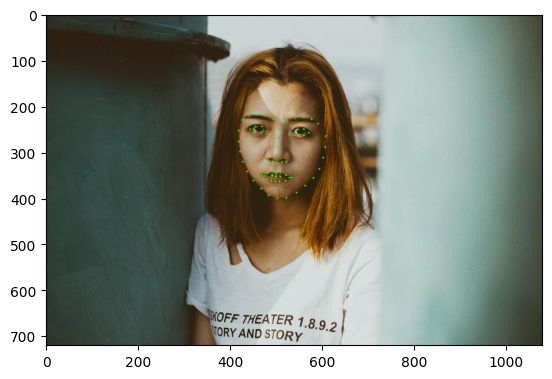

In [10]:
clone_input_img = input_img.copy()
clone_original_img = original_img.copy()

for i in range(68):
    x = input_landmarks.part(i).x
    y = input_landmarks.part(i).y
    cv2.circle(clone_input_img, (x, y), 2, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(clone_input_img, cv2.COLOR_BGR2RGB))
plt.show()

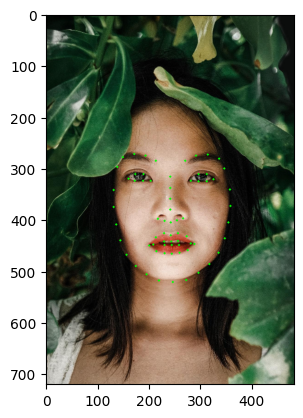

In [11]:
for i in range(68):
    x = original_landmarks.part(i).x
    y = original_landmarks.part(i).y
    cv2.circle(clone_original_img, (x, y), 2, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(clone_original_img, cv2.COLOR_BGR2RGB))
plt.show()

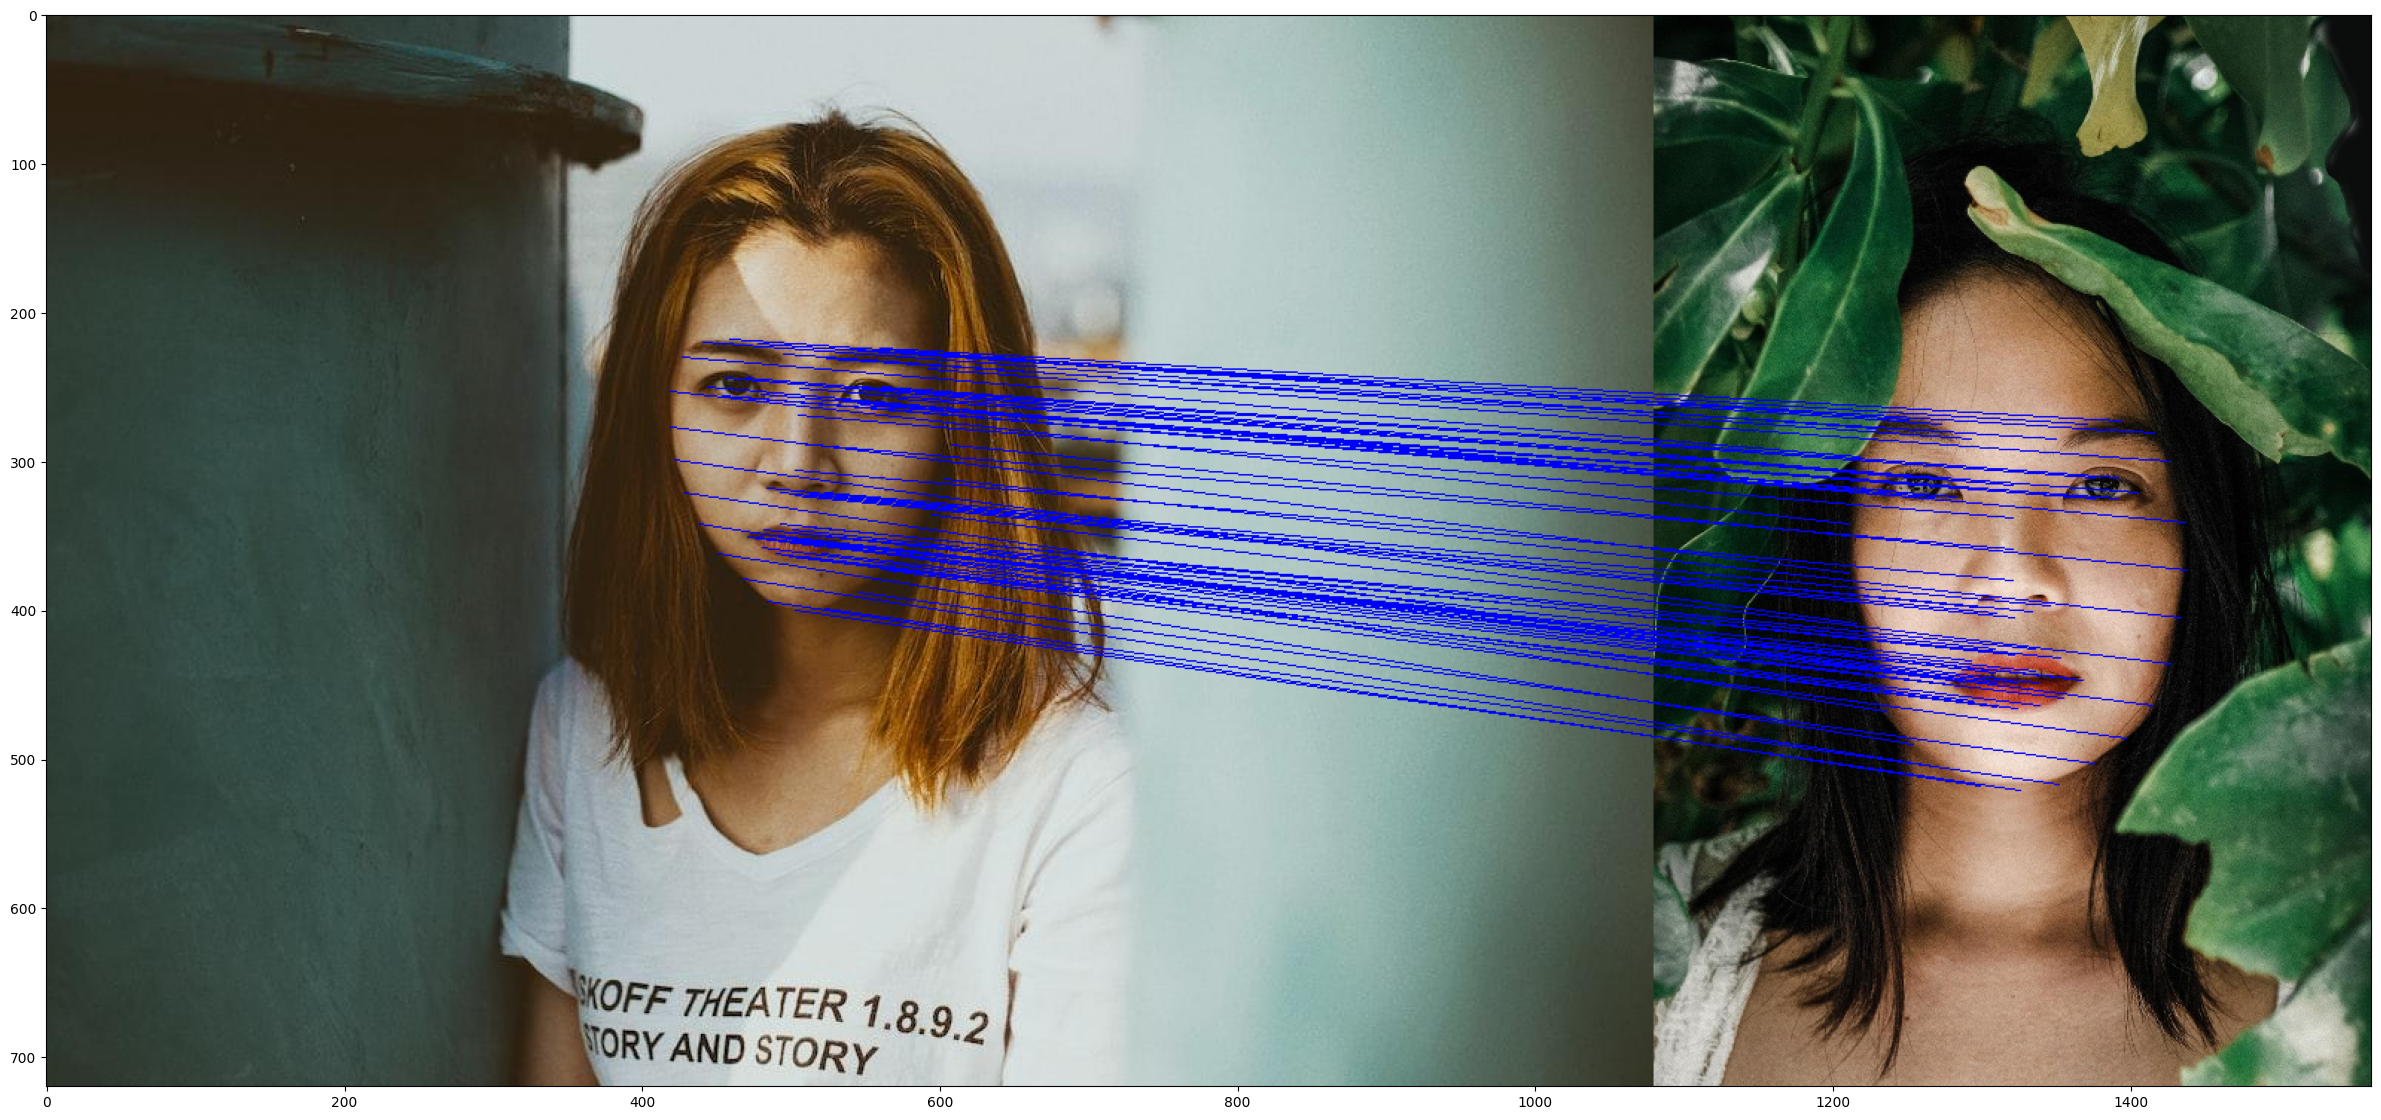

In [12]:
# 입력 이미지와 원본 이미지의 첫 번째 얼굴 랜드마크를 연결하여 시각화

#이미지 두개를 합치고
two_img = np.hstack((input_img, original_img))

# 합친 이미지에 랜드마크를 연결
for i in range(68):
    x_input = input_landmarks.part(i).x
    y_input = input_landmarks.part(i).y
    x_original = original_landmarks.part(i).x + input_img.shape[1] #input 이미지가 옆에 붙었으므로 x값 더해준다.
    y_original = original_landmarks.part(i).y
    cv2.line(two_img, (x_original, y_original), (x_input, y_input), (255, 0, 0), 1)

# 원본 이미지와 비교된 랜드마크 시각화
plt.figure(figsize=(30,20))
plt.imshow(cv2.cvtColor(two_img, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.imshow('res', two_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()